In [1]:
!pip install pandas
!pip install fix_yahoo_finance
!pip install pandas-datareader
!pip install matplotlib

import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

     |████████████████████████████████| 10.1MB 2.3MB/s eta 0:00:01
     |████████████████████████████████| 512kB 35.8MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 46.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 3.7MB/s eta 0:00:011
     |████████████████████████████████| 143kB 10.6MB/s eta 0:00:01
     |████████████████████████████████| 61kB 28.2MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/a3/1b/c0/91156c9ac30e03348d0d5d2a667cc54f3133cfa8070fded8c5
  Stored in directory: /home/jovyan/.cache/pip/wheels/82/27/ba/ae62240e6a22e138638b4b7f00d9803fc814bd10e343491dff
Successfully built fix-yahoo-finance multitasking
  Found existing installation: urllib3 1.24.2
    Uninstalling urllib3-1.24.2:
      Successfully uninstalled urllib3-1.24.2
  Found existing installation: idna 2.8
    Uninstalling idna-2.8:
      Successfully uninstalled idna-2.8
  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Su

In [15]:
vod = yf.Ticker("VOD.L")
gbond = yf.Ticker("IE00B50W2R13.IR")
vod.info # get stock info
hist = vod.history(period="max") # get historical market data
vod.actions # show actions (dividends, splits)
vod.dividends # show dividends
vod.splits # show splits

Date
1994-07-21    2.000000
1999-10-01    4.000000
2006-07-31    0.875000
2014-02-24    0.545455
Name: Stock Splits, dtype: float64

In [24]:
df_portfolio_info = pd.DataFrame.from_dict(vod.info, orient='index').T
df_portfolio_info.append(pd.DataFrame.from_dict(gbond.info, orient='index').T, sort=True).T

,0,0
ask,124.2,NaN
askSize,0,NaN
averageDailyVolume10Day,125580023,0
averageDailyVolume3Month,88517120,0
bid,124.16,NaN
bidSize,0,NaN
bookValue,2.564,NaN
currency,GBp,GBp
earningsTimestamp,1557819000,NaN
epsForward,0.1,NaN


In [111]:
#my portfolio
vod_price = pdr.get_data_yahoo("VOD.L")
vod_units = 1437
itv_price = pdr.get_data_yahoo("ITV.L")
itv_units = 1207
blnd_price = pdr.get_data_yahoo("BLND.L")
blnd_units = 417
vggbond_price = pdr.get_data_yahoo("IE00B50W2R13.IR")
vggbond_units = 32.9
vguk_price = pdr.get_data_yahoo("0P0000SAVS.L")
vguk_units = 72.9524
vgus_price = pdr.get_data_yahoo("0P0000KSPA.L")
vgus_units = 31.0345

In [147]:
vod_value = vod_price * vod_units 
itv_value = itv_price * itv_units 
blnd_value = blnd_price * blnd_units 
(vod_value + itv_value + blnd_value).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-10,587316.479828,574959.429039,583303.268333,581488.448158,1.017091e+11,581488.448158
2019-05-13,581563.334297,557891.302979,578967.258339,559331.651749,2.787469e+11,559331.651749
2019-05-14,569888.186661,548334.633766,557998.396751,552226.186760,2.904632e+11,552226.186760
2019-05-15,557378.882629,542613.508690,555355.272110,551237.456932,2.153164e+11,551237.456932
2019-05-16,555568.984741,544828.688736,549582.047630,550233.153488,5.661738e+10,550233.153488


In [9]:
#my portfolio
dict_portfolio ={"asset_name": ["Vodafone","ITV", "British Land", "Vanguard Global Bond","Vanguard UK All Share", "Vanguard US Equity"],
                       "asset_id": ["VOD.L","ITV.L", "BLND.L", "IE00B50W2R13.IR", "0P0000SAVS.L", "0P0000KSPA.L"],
                       "units": [1437,1207, 417, 32.9, 72.9524, 31.0345],
                       "currency" : ["pGBP","pGBP","pGBP","GBP","GBP","GBP"]}

df_portfolio = pd.DataFrame.from_dict(dict_portfolio)
df_portfolio

,asset_name,asset_id,units,currency
0,Vodafone,VOD.L,1437.0000,pGBP
1,ITV,ITV.L,1207.0000,pGBP
2,British Land,BLND.L,417.0000,pGBP
3,Vanguard Global Bond,IE00B50W2R13.IR,32.9000,GBP
4,Vanguard UK All Share,0P0000SAVS.L,72.9524,GBP
5,Vanguard US Equity,0P0000KSPA.L,31.0345,GBP


In [12]:
dict_portfolio

{'asset_name': ['Vodafone',
  'ITV',
  'British Land',
  'Vanguard Global Bond',
  'Vanguard UK All Share',
  'Vanguard US Equity'],
 'asset_id': ['VOD.L',
  'ITV.L',
  'BLND.L',
  'IE00B50W2R13.IR',
  '0P0000SAVS.L',
  '0P0000KSPA.L'],
 'units': [1437, 1207, 417, 32.9, 72.9524, 31.0345],
 'currency': ['pGBP', 'pGBP', 'pGBP', 'GBP', 'GBP', 'GBP']}

In [212]:
portfolio = pdr.get_data_yahoo(df_portfolio.iloc[0,1]) * df_portfolio.iloc[0,2] * 0.01
print(portfolio.loc['2019-04-18','Close'])

for asset, unit, currency in zip(df_portfolio.asset_id[1:], df_portfolio.units[1:], df_portfolio.currency[1:]):
    if currency == "GBP": 
        multiple = 1
    else:
        multiple = 0.01
    temp = multiple * pdr.get_data_yahoo(asset) * unit
    #print(asset, (pdr.get_data_yahoo(asset).Close * unit * multiple).tail(1))
    portfolio += temp
    print(portfolio.loc['2019-04-18','Close'])

2048.587164916992
3742.008201751709
6225.660099945068
11208.134575042724
26418.929268603515
41303.416613223264


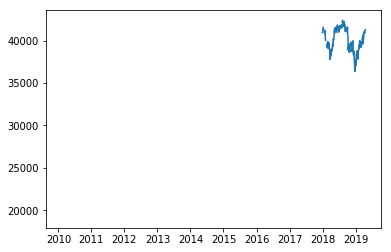

In [213]:
plt.plot(portfolio.Close)

In [42]:
data = yf.download("VOD", start="2018-01-01", end="2019-05-15")
#data.Close.corr()

[*********************100%***********************]  1 of 1 downloaded


In [49]:
#data = yf.download("VOD ITV.L", start="2018-11-01", end="2018-12-15")
data = yf.download("VOD ITV.L", start="2018-01-01", end="2019-01-01")
data.Close.corr()

[*********************100%***********************]  2 of 2 downloaded


,ITV.L,VOD
ITV.L,1.000000,0.321004
VOD,0.321004,1.000000


In [108]:

import fix_yahoo_finance as yf
yf.pdr_override()

# download dataframe
#BLND.L VOD.L ITV.L
stock1 = pdr.get_data_yahoo("VOD.L")
stock2 = pdr.get_data_yahoo("ITV.L")
print(stock1.shape)
print(stock2.shape)

(2366, 6)
(2366, 6)


In [109]:
asset_corr(stock1, stock2)

0.871460296298292

In [86]:
#returns correlation between 2 assets
def asset_corr(asset1, asset2):
    data = pd.concat([asset1['Adj Close'], asset2['Adj Close']],axis=1)
    data.dropna(inplace = True)
    correlation = data.corr()
    return(correlation.iloc[0,1])    

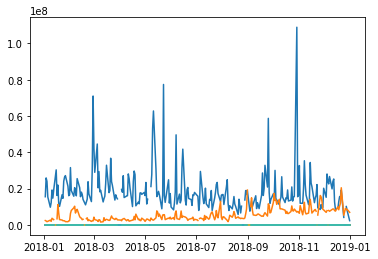

In [82]:
plt.plot(data)